In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import requests
import os

# 设置样式
sns.set_theme(style="whitegrid")



In [2]:
from datetime import datetime

# 将日期转换为 datetime 对象
date = datetime(2024,8,1)
# 将 datetime 对象转换为毫秒级时间戳
milliseconds_timestamp = int(datetime.timestamp(date) * 1000)
print(milliseconds_timestamp)

1722441600000


In [3]:
import ccxt
import pandas as pd

def get_upbit_data():
    upbit = ccxt.upbit()
    # 获取 BTC-KRW 的历史数据
    ohlcv = upbit.fetch_ohlcv('KRW-BTC', timeframe='1d')  
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    df['close'] = df['close'].astype(float)
    return df

def get_binance_data():
    binance = ccxt.binance()
    # 获取 BTC/USDT 的历史数据
    since = 1722441600000  # 时间戳（毫秒级）
    ohlcv = binance.fetch_ohlcv('BTC/USDT', timeframe='1d', since=since)  
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    df['close'] = df['close'].astype(float)
    return df

upbit_data = get_upbit_data()
binance_data = get_binance_data()

# 检查时间范围
print("Upbit Data Time Range:")
print("Start:", upbit_data.index.min())
print("End:", upbit_data.index.max())

print("\nBinance Data Time Range:")
print("Start:", binance_data.index.min())
print("End:", binance_data.index.max())

# 对齐数据
data = pd.concat([upbit_data['close'], binance_data['close']], axis=1, keys=['Upbit', 'Binance']).dropna()

# 检查数据是否成功获取
print("\nData Overview:")
print("data.head():")
print(data.head())
print("\ndata.shape:", data.shape)
print("\ndata.dtypes:")
print(data.dtypes)

Upbit Data Time Range:
Start: 2024-08-01 00:00:00
End: 2025-02-16 00:00:00

Binance Data Time Range:
Start: 2024-08-01 00:00:00
End: 2025-02-16 00:00:00

Data Overview:
data.head():
                 Upbit   Binance
timestamp                       
2024-08-01  91789000.0  65354.02
2024-08-02  86691000.0  61498.33
2024-08-03  85957000.0  60697.99
2024-08-04  81871000.0  58161.00
2024-08-05  77833000.0  54018.81

data.shape: (200, 2)

data.dtypes:
Upbit      float64
Binance    float64
dtype: object


In [4]:
# 对齐数据
data = pd.concat([upbit_data['close'], binance_data['close']], axis=1, keys=['Upbit', 'Binance']).dropna()

# 数据分割
split_index = int(len(data) * 0.5)
backtest_data = data.iloc[:split_index]
forwardtest_data = data.iloc[split_index:]

# 检查数据是否成功分割
print("Backtest Data Overview:")
print("backtest_data.head():")
print(backtest_data.head())
print("\nBacktest Data Shape:", backtest_data.shape)

print("\nForward Test Data Overview:")
print("forwardtest_data.head():")
print(forwardtest_data.head())
print("\nForward Test Data Shape:", forwardtest_data.shape)

Backtest Data Overview:
backtest_data.head():
                 Upbit   Binance
timestamp                       
2024-08-01  91789000.0  65354.02
2024-08-02  86691000.0  61498.33
2024-08-03  85957000.0  60697.99
2024-08-04  81871000.0  58161.00
2024-08-05  77833000.0  54018.81

Backtest Data Shape: (100, 2)

Forward Test Data Overview:
forwardtest_data.head():
                  Upbit   Binance
timestamp                        
2024-11-09  106294000.0  76677.46
2024-11-10  111440000.0  80370.01
2024-11-11  124503000.0  88647.99
2024-11-12  124967000.0  87952.01
2024-11-13  128111000.0  90375.20

Forward Test Data Shape: (100, 2)


C:\Users\31290\AppData\Local\Temp\ipykernel_23412\4210649299.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['Upbit'][i - 1] == 0:
C:\Users\31290\AppData\Local\Temp\ipykernel_23412\4210649299.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  upbit_return = (data['Upbit'][i] - data['Upbit'][i - 1]) / data['Upbit'][i - 1]
C:\Users\31290\AppData\Local\Temp\ipykernel_23412\4210649299.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser

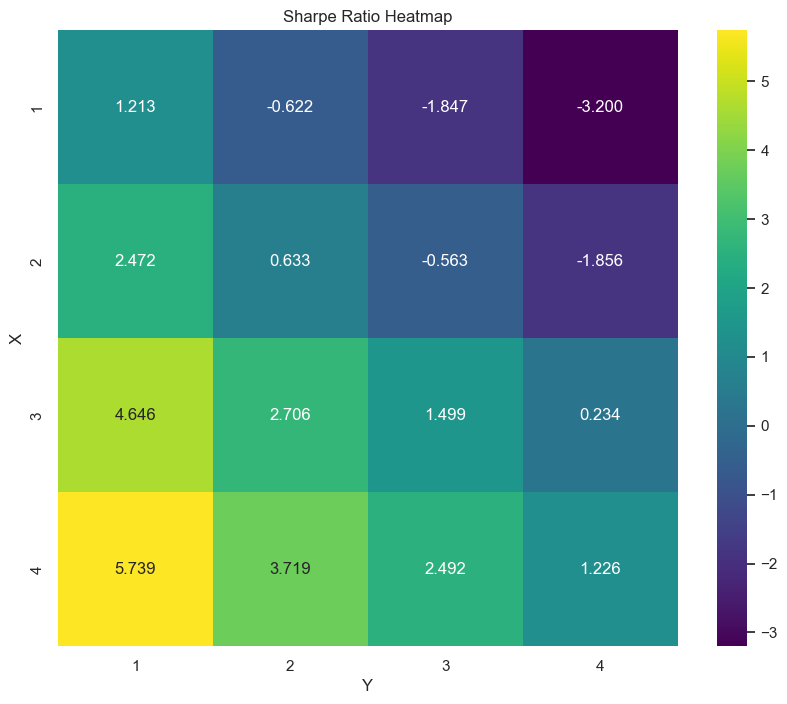

Optimal Parameters:
X: 4%
Y: 1%
CAGR: 1057.89%
Max Drawdown: -16.25%
Sharpe Ratio: 5.74

Forward Test Metrics:
CAGR: -77.05%
Max Drawdown: -42.21%
Sharpe Ratio: -4.28


C:\Users\31290\AppData\Local\Temp\ipykernel_23412\4210649299.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['Upbit'][i - 1] == 0:
C:\Users\31290\AppData\Local\Temp\ipykernel_23412\4210649299.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  upbit_return = (data['Upbit'][i] - data['Upbit'][i - 1]) / data['Upbit'][i - 1]
C:\Users\31290\AppData\Local\Temp\ipykernel_23412\4210649299.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser

In [5]:
def backtest_strategy(data, X, Y):
    positions = []
    portfolio = [10000]
    signals = []
    for i in range(1, len(data)):
        if data['Upbit'][i - 1] == 0:
            continue
        upbit_return = (data['Upbit'][i] - data['Upbit'][i - 1]) / data['Upbit'][i - 1]
        if upbit_return >= X / 100:
            position = 1  # Long
            signal = 1
        elif upbit_return <= -Y / 100:
            position = -1  # Short
            signal = -1
        else:
            position = 0  # Flat
            signal = 0
        positions.append(position)
        signals.append(signal)
        
        if position == 1:
            portfolio.append(portfolio[-1] * (1 + (data['Binance'][i] - data['Binance'][i - 1]) / data['Binance'][i - 1]))
        elif position == -1:
            portfolio.append(portfolio[-1] * (1 + (data['Binance'][i] - data['Binance'][i - 1]) / data['Binance'][i - 1]))
        elif position == 0:
            portfolio.append(portfolio[-1])
    
    portfolio_df = pd.Series(portfolio, index=data.index)
    
    cagr = (portfolio_df[-1] / portfolio_df[0]) ** (1 / (len(data) / 365)) - 1
    max_drawdown = (portfolio_df / portfolio_df.cummax() - 1).min()
    daily_returns = portfolio_df.pct_change().dropna()
    
    sharpe_ratio = daily_returns.mean() / daily_returns.std() * (365 ** 0.5)
    
    return portfolio_df, cagr, max_drawdown, sharpe_ratio

def calculate_cagr(portfolio):
    initial_value = portfolio[0]
    final_value = portfolio[-1]
    years = len(portfolio) / 365  # 假设数据是按天提供的
    return (final_value / initial_value) ** (1 / years) - 1

def calculate_max_drawdown(portfolio):
    if len(portfolio) < 1:
        return 0.0
    cumulative_returns = portfolio / portfolio[0]
    rolling_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns - rolling_max) / rolling_max
    max_drawdown = drawdown.min()
    return max_drawdown

def calculate_sharpe_ratio(daily_returns):
    if len(daily_returns) < 2:
        return 0.0
    mean = daily_returns.mean()
    std = daily_returns.std()
    if std == 0:
        return 0.0
    sharpe_ratio = mean / std * (365 ** 0.5)  # 年化夏普比率
    return sharpe_ratio
    
def grid_search(X_range, Y_range, data, testing_data):
    cagr_values = []
    max_drawdown_values = []
    sharpe_values = []
    
    for X in X_range:
        for Y in Y_range:
            try:
                _, cagr, max_drawdown, sharpe_ratio = backtest_strategy(data, X, Y)
                cagr_values.append(cagr)
                max_drawdown_values.append(max_drawdown)
                sharpe_values.append(sharpe_ratio)
            except Exception as e:
                print(f"Error for X={X}, Y={Y}: {e}")
                cagr_values.append(np.nan)
                max_drawdown_values.append(np.nan)
                sharpe_values.append(np.nan)
    
    # 创建一个 DataFrame 来存储结果
    X_grid, Y_grid = np.meshgrid(X_range, Y_range)
    X_values = X_grid.flatten()
    Y_values = Y_grid.flatten()
    
    results = pd.DataFrame({
        'X': X_values,
        'Y': Y_values,
        'CAGR': cagr_values,
        'Max Drawdown': max_drawdown_values,
        'Sharpe Ratio': sharpe_values
    })
    
    # 重新调整数据为矩阵形式，用于热图
    results_pivot = results.pivot(index='X', columns='Y', values='Sharpe Ratio')
    plt.figure(figsize=(10, 8))
    sns.heatmap(results_pivot, annot=True, cmap='viridis', fmt=".3f")
    plt.title('Sharpe Ratio Heatmap')
    plt.xlabel('Y')
    plt.ylabel('X')
    plt.show()
    
    # 返回最优参数
    best_index = np.nanargmax(results['Sharpe Ratio'])
    best_X = results['X'][best_index]
    best_Y = results['Y'][best_index]
    best_cagr = results['CAGR'][best_index]
    best_max_drawdown = results['Max Drawdown'][best_index]
    best_sharpe = results['Sharpe Ratio'][best_index]
    
    return best_X, best_Y, best_cagr, best_max_drawdown, best_sharpe

# 测试代码
if __name__ == "__main__":
    # 定义 X 和 Y 的搜索范围
    X_range = np.arange(1, 5, 1)  # X 从 1% 到 5%，步长 1%
    Y_range = np.arange(1, 5, 1)  # Y 从 1% 到 5%，步长 1%
    
    # 网格搜索最优参数
    best_X, best_Y, best_cagr, best_max_drawdown, best_sharpe = grid_search(X_range, Y_range, backtest_data, forwardtest_data)
    
    print(f"Optimal Parameters:")
    print(f"X: {best_X}%")
    print(f"Y: {best_Y}%")
    print(f"CAGR: {best_cagr:.2%}")
    print(f"Max Drawdown: {best_max_drawdown:.2%}")
    print(f"Sharpe Ratio: {best_sharpe:.2f}")
    
    # 使用最优参数进行前向测试
    portfolio_forward, _, _, _ = backtest_strategy(forwardtest_data, best_X, best_Y)
    
    # 计算前向测试的评估指标
    cagr_forward = calculate_cagr(portfolio_forward)
    max_drawdown_forward = calculate_max_drawdown(portfolio_forward)
    daily_returns_forward = portfolio_forward.pct_change().dropna()
    sharpe_ratio_forward = calculate_sharpe_ratio(daily_returns_forward)
    
    print("\nForward Test Metrics:")
    print(f"CAGR: {cagr_forward:.2%}")
    print(f"Max Drawdown: {max_drawdown_forward:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio_forward:.2f}")